In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
df_predict = pd.read_csv('Dataset/iphone_data_predict.csv')

In [3]:
df_predict

,Unnamed: 0,current_price,nama_toko,iphone_type_memory,color,sold_count,discount_value,memory,model,iphone_type,variant_Plus,variant_Pro,variant_Pro_Max,variant_normal
0,0,6999000,ibox_official,Apple iPhone 11 64GB,Black,4700.0,1000000.0,64.0,11.0,iPhone 11,0,0,0,1
1,1,11999000,ibox_official,Apple iPhone 13 128GB,Pink,1200.0,3200000.0,128.0,13.0,iPhone 13,0,0,0,1
2,2,8999000,ibox_official,Apple iPhone 11 128GB,Black,5400.0,250000.0,128.0,11.0,iPhone 11,0,0,0,1
3,3,8999000,ibox_official,Apple iPhone 11 128GB,White,3700.0,250000.0,128.0,11.0,iPhone 11,0,0,0,1
4,4,15199000,ibox_official,Apple iPhone 13 128GB,Blue,978.0,4800000.0,128.0,13.0,iPhone 13,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,373,26499000,digimap,Apple iPhone 14 Pro Max 512GB Space Black,Space Black,8.0,0.0,512.0,14.0,iPhone 14 Pro Max,0,0,1,0
262,374,16999000,digimap,Apple iPhone 13 Pro 128GB Alpine Green,Alpine Green,58.0,0.0,128.0,13.0,iPhone 13 Pro,0,1,0,0
263,375,11499000,digimap,Apple iPhone 12 128GB Green,Green,308.0,6200000.0,128.0,12.0,iPhone 12,0,0,0,1
264,376,14299000,digimap,Apple iPhone 13 256GB Green,Green,172.0,6900000.0,256.0,13.0,iPhone 13,0,0,0,1


In [4]:
df_predict['memory'] = df_predict['memory'].replace(1028.0, 1024.0)

In [6]:
df_predict = df_predict.drop(columns = ['Unnamed: 0'])

In [7]:
# calculate correlation matirix 
correlation_ohe = df_predict.corr()

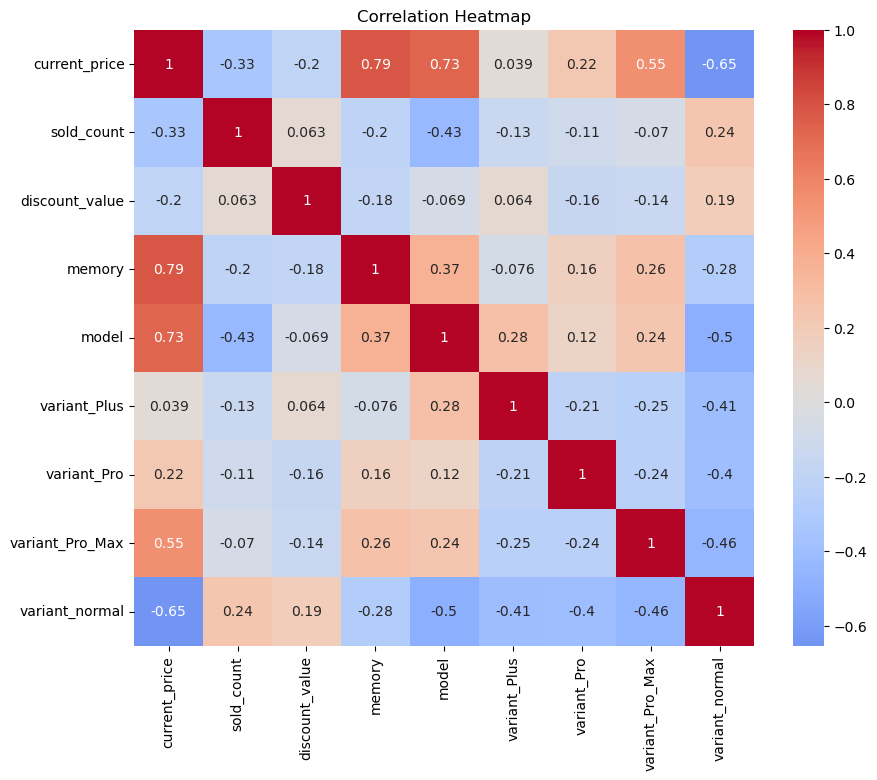

In [8]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_ohe, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Gradient Boost

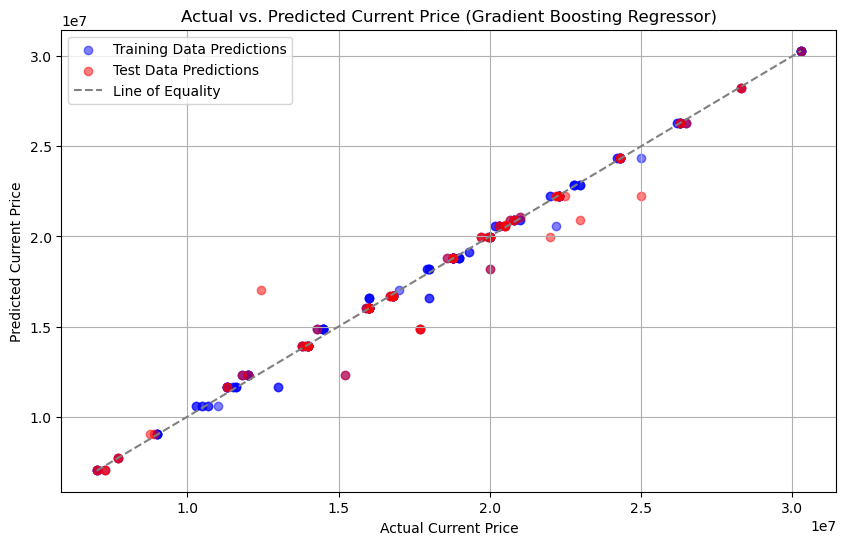

In [9]:
# Features (memory and model)
x = df_predict[['memory','model','variant_Plus','variant_normal','variant_Pro_Max','variant_Pro']]

# Target variable (current_price)
y = df_predict['current_price']

# Split the data into training and test sets (70% training, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create a GradientBoostingRegressor model
gradient_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on training data
gradient_model.fit(x_train, y_train)

# Make predictions on training and test data
g_train_predictions = gradient_model.predict(x_train)
g_test_predictions = gradient_model.predict(x_test)

# Plot predictions for training and test data
plt.figure(figsize=(10, 6))

# Scatter plot for training data predictions (blue)
plt.scatter(y_train, g_train_predictions, color='blue', alpha=0.5, label='Training Data Predictions')

# Scatter plot for test data predictions (red)
plt.scatter(y_test, g_test_predictions, color='red', alpha=0.5, label='Test Data Predictions')

# Line of equality (gray)
equality_line = np.linspace(min(y), max(y), 100)
plt.plot(equality_line, equality_line, color='gray', linestyle='--', label='Line of Equality')

plt.xlabel('Actual Current Price')
plt.ylabel('Predicted Current Price')
plt.title('Actual vs. Predicted Current Price (Gradient Boosting Regressor)')
plt.legend()
plt.grid(True)

plt.show()


In [29]:
# Calculate metrics for both training and test data
g_train_mse = mean_squared_error(y_train, g_train_predictions)
g_train_r2 = r2_score(y_train, g_train_predictions)
g_train_mae = mean_absolute_error(y_train, g_train_predictions)
g_rmse_train = np.sqrt(g_train_mse)

print("Training Data:")
print("Gradient MSE:", g_train_mse)
print("Gradient MAE:", g_train_mae)
print("Gradient RMSE", g_rmse_train)
print("Gradient R-squared:", g_train_r2)

g_test_mse = mean_squared_error(y_test, g_test_predictions)
g_test_r2 = r2_score(y_test, rf_test_predictions)
g_test_mae = mean_absolute_error(y_test, g_test_predictions)
g_rmse_test = np.sqrt(g_test_mse)

print("\nTesting Data:")
print("Gradient MSE:", g_test_mse)
print("Gradient MAE:", g_test_mae)
print("Gradient RMSE", g_rmse_test)
print("Gradient R-squared:", g_test_r2)

Training Data:
Gradient MSE: 203427890291.5331
Gradient MAE: 219787.10882957463
Gradient RMSE 451029.8108678994
Gradient R-squared: 0.9933867638865993

Testing Data:
Gradient MSE: 938031834965.5618
Gradient MAE: 410079.4930006993
Gradient RMSE 968520.4360082247
Gradient R-squared: 0.9653018163759745


In [10]:
# New features for prediction with Linear Reg
new_memory = 128
new_model = 14
variant_Plus = 0
variant_normal = 0
variant_Pro_Max = 0
variant_Pro = 1

# Prepare the new features as a numpy array
new_features = np.array([[new_memory, new_model, variant_Plus, variant_normal, variant_Pro_Max, variant_Pro]])

# Use the trained model to make predictions on the new features
new_predict = gradient_model.predict(new_features)

# Print the predicted current price
print(f"Predict current price for iPhone {new_model} with {new_memory} GB memory: {new_predict} (Using Gradient Boost)")

Predict current price for iPhone 14 with 128 GB memory: [18170572.70865791] (Using Gradient Boost)


In [11]:
# we will use gradient boost

In [12]:
# save model to pickle

In [13]:
with open('gradient_model.pkl', 'wb') as model_file:
    pickle.dump(gradient_model, model_file)